##### Primeiros passos em scraping - raspagem de dados - sites com notícias ('padronizadas')

In [1]:
#by Josenalde Oliveira 

#!pip install newspaper3k
# Doc em https://newspaper.readthedocs.io/en/latest/
from newspaper import Article

def scrapingArticle(url, language):
    # pode-se passar idioma como parâmetro
    article = Article(url, language) # instancia um objeto da classe Article, com a url no construtor
    article.download() # passo 2) fazer o download da ufrn para o objeto article
    article.parse() # passo 3) após o download, é feita uma 'tokenização', com base em tags chave etc. para permitir aplicar
                    #métodos como summary, keywords, authors, top_image, publish_date, etc.'''
    
    # por exemplo, se uma das saídas da função são os autores
    if (article.authors is not None):
        print('Autores: ' + str(article.authors))
    
    # obter a data de publicação
    date = article.publish_date
    if (date is not None):
        print('Publicado em: ' + date.strftime('%d/%m/%Y'))
    
    # Imprimir apenas a imagem principal do artigo
    if (article.top_image is not None):
        print('Imagem principal: ' + article.top_image)
    
    # Imprimir a url de todas as imagens no artigo
    if (len(article.images) > 0):
        image_string = "Imagens no artigo: "
        for image in article.images:
            image_string += '\n\t' + str(image)
        print(image_string)
      
    # se for necessário realizar análise de linguagem natural (nlp), para facilitar quebra de texto em sentenças para melhor
    # detecção de palavras e partes de falas (entrevistas etc.) adiciona-se a lib punkt e o método nlp(), mas é custoso e caso
    # a aplicação não demande, não é necessário as duas linhas abaixo
    
    article.download('punkt')
    article.nlp()
    
     # Imprimir palavras-chave (após usar nlp)
    if (len(article.keywords) > 0):
        print("Palavras-chave: " + str(article.keywords))
    
    """ Obter um resumo (summary) do texto, semanticamente coerente; neste caso usa o punkt e nlp() para pegar as 5 primeiras
    sentenças que foram tokenizadas e constrói um sumário """
    print(article.summary)    
    # --------------- end function ---------------- #

    
    
url1 = 'https://www.nytimes.com/2020/09/22/technology/digital-divide-solutions.html'
lan1 = 'en-us'
url2 = 'https://ufrn.br/imprensa/noticias/44339/forum-de-inovacao-e-negocios-em-ceramica-abre-inscricoes'
url3 = 'http://www.tribunadonorte.com.br/noticia/rn-vacinou-27-2-do-paoblico-alvo-mas-tem-doses-suficientes-para-idosos-do-1ao-grupo/502751'
url4 = 'https://agorarn.com.br/ultimas/prf-inicia-operacao-carnaval-2021-nas-rodovias-federais/'
url5 = 'https://www.uol.com.br/universa/noticias/redacao/2021/02/12/minha-historia-rafaella.htm'
url6 = 'https://ufrn.br/imprensa/noticias/'
lan2 = 'pt-br'
scrapingArticle(url3, lan2)

# páginas no www.ufrn.br não 'raspáveis' por esta lib !!!!! - parse de HTML (beautiful soup é uma opção)
#scrapingArticle(url2)

# Função para obter todas as matérias num site
import newspaper
def getAllNews(url):
    urlNews = newspaper.build(url)
    print('Artigos: \n')
    for article in urlNews.articles:
        print(article.url)
    
    print('Seções: \n')
    for category in urlNews.category_urls():
        print(category)
# ----------- end getAllNews ----------- 

#getAllNews(url6)


Autores: []
Imagem principal: http://arquivos.tribunadonorte.com.br/fotos/243986.jpg
Imagens no artigo: 
	http://www.tribunadonorte.com.br/app/assets/images/bloggers/small/augustobezerril.jpg
	http://www.tribunadonorte.com.br/app/assets/images/columns/small/vicente_serejo.jpg
	http://thumbor.tribunadonorte.com.br/unsafe/150x150/smart/portal/247562.jpg
	http://www.tribunadonorte.com.br/app/assets/images/columns/small/direito_e_desenvolvimento.png
	http://www.tribunadonorte.com.br/app/assets/images/ouca-jovem-pan-news-natal.png
	http://www.tribunadonorte.com.br/app/assets/images/bloggers/small/heitorgregorio.jpg
	http://www.tribunadonorte.com.br/app/assets/images/bloggers/small/vinodivinovino.jpg
	http://www.tribunadonorte.com.br/app/assets/images/bloggers/small/territoriolivre.jpg
	http://www.tribunadonorte.com.br/app/assets/images/columns/small/cassiano_arruda.jpg
	http://www.tribunadonorte.com.br/app/assets/images/lupa.png
	http://www.tribunadonorte.com.br/app/assets/images/three-line

In [86]:
#!pip install newspaper3k
# Doc em https://newspaper.readthedocs.io/en/latest/
from newspaper import Article
article = Article('https://pt.wikipedia.org/wiki/Lista_de_ganhadores_do_Pr%C3%AAmio_IgNobel', 'pt-br')
article.download()
article.parse()
#print(article.text) #exibe texto completo sem as tags HTML
#print(article.html) #com as tags


#### No exemplo acima, a página wiki não possui as estruturas identificáveis pelos métodos do Article, como authors, publish_date, summary etc., retornando none. Esta lib é para sites de notícias no sentido jornalístico. Será mais adequado ferramenta de raspagem por tags html


In [12]:
article.authors # e ainda os métodos summary, keywords, top_image (devolve a url da imagem principal), publish_date, movies, images (devolve lista de urls de todas imagens da url do artigo)

[]

#### Vamos utilizar as libs Beautiful Soup (bs4) e Requests, para extrair dados a partir das tags HTML

In [5]:
#!pip install bs4
#!pip instal requests

# Interpretador python embutido não é tão flexível, e pode ocorrer problemas com html mal formatado. O interpretador html5lib ajuda

#!pip install html5lib

import requests
from bs4 import BeautifulSoup as soup

# função para obter conteúdo html
def getHTMLContent(url):
    html = requests.get(url).text
    soupPage = soup(html, 'html5lib') # ao invés de soup(html, 'html-parser')
    
    # Exibe HTML de toda a página
    #print(soupPage)
    
    # Após inspeção visual (ctrl+shift+I no Chrome, por exemplo)
    # Verifica-se, neste caso do NYTimes, que os artigos mais recentes estão dentro de uma tag <script> com parâmetro type application ld/json
    # obter todos os conteúdos com esta tag (primeira filtragem)
    containers = soupPage.find_all('script', {'type': 'application/ld+json'})
    # find_all retorna todas as ocorrências onde há a tag <script> com o parâmetro type: application/ld+json
    # um uso comum também é passar a classe (css) da tag, algo como {'class': <nomedaclasse>}
    
    # Conforme a Figura abaixo, tem-se uma estrutura de dicionário dentro da tag script. Vamos obter a lista de artigos neste dicionario
    article_list = [] # inicializa lista vazia
    
    # Vamos iterar em loops aninhados
    for container in containers:
        for dictionary in container:
            article_list.append(dictionary)
    
    #print(article_list)

    # Remover espaços em branco entre os dicionários - exemplo os dois primeiros
    # Método join junta cada item da string com um delimitador especificado.
    # ", ".join("abc") resulta 'a, b, c' - o inverso do split()
    article_list[0:2] = [''.join(article_list[0:2])]

    # Remoção de duplicates no dicinário: @contents: schema.org, usando apenas o primeiro elemento de article_list

    contentString = article_list[0]

    #print(contentString)
    
    # Ao observar a string acima, a lista de artigos está em itemListElement, entao pode ser usada esta palavra como index de seleção
    # Remove informação desnecessária antes do index definido abaixo
    articleIndex = contentString.index('itemListElement')

    # Remover a palavra itemListElement: do início de contentString - alterando acima
    contentString = contentString[articleIndex + 18:] # a partir do index em diante

    #print(contentString)

    import json
    a = contentString 
    print(type(a))        
    
url1 = 'http://www.nytimes.com/section/technology' # sem o http não funciona
# Deseja-se obter os últimos artigos de tecnologia da seção no jornal NY
getHTMLContent(url1) 

<class 'str'>


<img>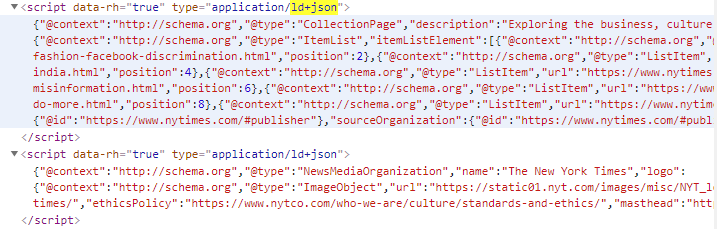</img>

#### Agora, vamos examinar a página wiki do ignobel:


In [81]:
import requests
from bs4 import BeautifulSoup as soup

# função para obter conteúdo html
def getHTMLContent(url):
    html = requests.get(url).text
    # se usar apenas requests.get(url) retorna status code html.status_code (200, 404 etc.)
    # pode-se exibir conteúdo também com html.content
    soupPage = soup(html, 'html5lib') # ao invés de soup(html, 'html-parser')
    
    # Exibe HTML de toda a página
    #print(soupPage.prettify)
    
    # Niveis superiores da página
    # soupPage.children retorna gerador de listas, pode-se usar list(soupPage.children) para exibir
    # Obtem container com os anos de cada premio
    containers = soupPage('span', {'class': 'mw-headline'})
    
    # lista os anos - remove os dois ultimos elementos que são textos Referencias e Notas, desnecessários
    containers.pop()
    containers.pop()
    for ano in containers:
        print(ano.text)
    
    # outra forma de obter os anos
    #anos = [span.text
    #        for div in soupPage('div', 'mw-content-ltr')
    #        for span in div('span', 'mw-headline')] 
    
    premios = [li.text
               for ul in soupPage('ul')
               for li in ul('li')]
    # retorna lista de anos do índice - separar
    
    #print(anos)
    premios = premios[32:] # remove indice de anos de premiacoes
    #print(premios)
    for i in range(0,len(premios)):
        print(premios[i] + '\n') # não separa por anos

url = 'https://pt.wikipedia.org/wiki/Lista_de_ganhadores_do_Pr%C3%AAmio_IgNobel' 
getHTMLContent(url)

1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Química: Jacques Benveniste, produtivo e dedicado correspondente da revista Nature, pela persistência na descoberta de que a água é um líquido inteligente e por demonstrar que ela é capaz de se lembrar de acontecimentos muito depois de todos os vestígios desses acontecimentos terem desaparecido.

Medicina: Alan Kligerman, idealizador do alívio digestivo utilizando vapor e inventor do Beano,[2] pelo seu trabalho pioneiro com líquidos antigás, que previnem inchaço, flatulência, desconforto e embaraços.

Educação: James Danforth Quayle (na época, vice-presidente dos EUA), tido como de "baixo QI", com declarações confusas, demonstrando assim, mais do que ninguém, a necessidade de educação científica.[3]

Biologia: Robert Klerk Graham, seleccionador de sementes e profeta da reprodução, pelo seu desenvolvimento pioneiro de um "Banco para Seleçã